In [1]:
# the usual imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

/var/folders/gc/n9f0hqw521d0_z3nmf82zyrc0000gn/T/ipykernel_1861/2491279070.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("vgsales.csv")

In [3]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,28,2006,12,360,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,13,1985,5,360,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,28,2008,7,360,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,28,2009,12,360,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,7,1996,8,360,11.27,8.89,10.22,1.00,31.37


In [4]:
df["Name"].value_counts()

Name
Need for Speed: Most Wanted                12
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
                                           ..
Ar tonelico Qoga: Knell of Ar Ciel          1
Galaga: Destination Earth                   1
Nintendo Presents: Crossword Collection     1
TrackMania: Build to Race                   1
Know How 2                                  1
Name: count, Length: 11493, dtype: int64

In [5]:
# we dont have any stirng values in the dataset thereby we are going to remvoe Name colum
df = df.drop("Name", axis= 1)

In [6]:
df.head()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,28,2006,12,360,41.49,29.02,3.77,8.46,82.74
1,2,13,1985,5,360,29.08,3.58,6.81,0.77,40.24
2,3,28,2008,7,360,15.85,12.88,3.79,3.31,35.82
3,4,28,2009,12,360,15.75,11.01,3.28,2.96,33.00
4,5,7,1996,8,360,11.27,8.89,10.22,1.00,31.37


In [7]:
df.isna().sum()

Rank              0
Platform          0
Year            271
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      2
dtype: int64

In [8]:
# Drop rows with missing values
df = df.dropna()

In [9]:
df.duplicated().sum()

0

In [10]:
 # print the columns so we can copy the other 
# columns into the X later easily
df.columns

Index(['Rank', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [11]:
# MinMaxScaler assign each variable in the column a value
# between 0 and 1
# 0 = min value of the column
# 1 = max value of the column
min = df['Global_Sales'].min()
max = df['Global_Sales'].max()
print(min, max)

0.01 82.74


In [12]:
# select the variables that are going to scaled (continuous variables only)
num_vars  = ["Year", "Platform", "Genre", "Publisher"]

# MinMaxScaler is the basic scaler. basically: 0 means lowest value in the column
# 1 means highest value in the column. all values will be decimals between 0 and 1
# from sklearn.preprocessing import MinMaxScaler
# scaler_with_price = MinMaxScaler()
# df[num_vars] = scaler_with_price.fit_transform(df[num_vars])

In [13]:
# if you  have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
X = df[num_vars]

# have only the target variable here (dependent variable)
y = df['Global_Sales']

In [14]:
 # create train and test sets of your dataset
# random_state is optional, you can lock this down in order to 
# to get same results always
# this examples reserves 30% for test data, 70% for training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
# create an empty linear regression model
# and fit it with out data 
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [16]:
 # make test predictions with new data with our model
predictions = lm.predict(X_test)

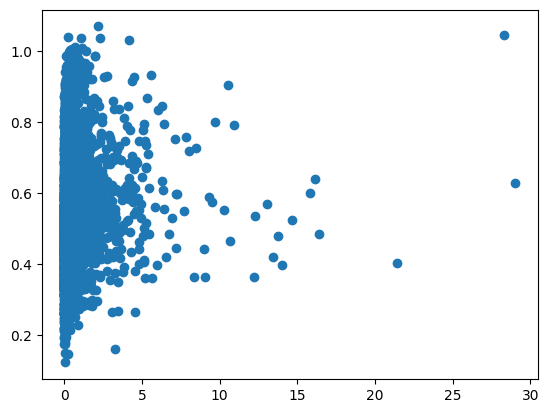

In [17]:
# these values follow a line = good predictions
# we basically compare the predicted values 
# to true test values and see the differences
# interesting idea to try, add a regression line:
# https://python-graph-gallery.com/scatterplot-with-regression-fit-in-matplotlib/
plt.scatter(y_test, predictions)
plt.show()

In [18]:
df["Year"].unique()

array(['2006', '1985', '2008', '2009', '1996', '1989', '1984', '2005',
       '1999', '2007', '2010', '2013', '2004', '1990', '1988', '2002',
       '2001', '2011', '1998', '2015', '2012', '2014', '1992', '1997',
       '1993', '1994', '1982', '2003', '1986', '2000', '1995', '2016',
       '1991', '1981', '1987', '1980', '1983', '2020', '2017'],
      dtype=object)

In [19]:
 # let's try with some new imaginary data
tester_row = {
    "Year":2006,
     "Platform": 28,
    "Genre":12,
    "Publisher": 360
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])

 # scale our tester row with original scaler
# drop price-column after scaling
tester_row[num_vars] = scaler_with_price.transform(tester_row[num_vars])
tester_row = tester_row.drop('Global_Sales', axis=1)

In [20]:
# use our model to predict our tester_row data
result = lm.predict(tester_row)[0]

print()
print(f"Predicted price for this house::")
print(f"{round(float(result), 2)} $")
print("----------------")


Predicted price for this house::
0.69 $
----------------


In [21]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2), "$")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2), "$^2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2), "$")

# R-squared. 0 = the model describes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))

MAE
0.58 $

MSE
1.68 $^2

RMSE:
1.3 $

R-squared:
0.01


In [22]:
# use our model to predict our tester_row data
result = lm.predict(tester_row)[0]

# save the predicted house price back into tester_row
tester_row['Global_Sales'] = result

# final step, inverse transform to get actual values back
tester_row[num_vars] = scaler_with_price.inverse_transform(tester_row[num_vars])
result = tester_row['Global_Sales']

print()
print(f"Predicted price with given apartment parameters:")
print(f"{round(float(result), 2)} $")
print("----------------")

NameError: name 'scaler_with_price' is not defined

In [ ]:
# MAE - Mean average error
print("MAE")
print(round(metrics.mean_absolute_error(y_test, predictions), 2), " error units")

# MSE - Mean square error
print("\nMSE")
print(round(metrics.mean_squared_error(y_test, predictions), 2), " error unit ^ 2")

# RMSE - Root mean square error
print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, predictions)), 2), " error units (~%, 0.1 = 10%)")

# R-squared. 0 = the model describes the dataset poorly
# 1 = model describes the dataset perfectly
print('\nR-squared:')
print(round(metrics.r2_score(y_test, predictions), 2))

MAE
0.58  error units

MSE
1.68  error unit ^ 2

RMSE:
1.3  error units (~%, 0.1 = 10%)

R-squared:
0.01
